In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

In [2]:
# data = pd.read_csv('/eos/user/r/rasharma/www/FilesForDan/Resolved_Category_BugFix/WWJJ_EWK/WplusToLNuWminusTo2JJJ_EWK_LO_SM_MJJ100PTJ10_TuneCUETP8M1_13TeV-madgraph-pythia8.txt', sep="\t", header=None)
# data = pd.read_csv('/eos/user/r/rasharma/www/FilesForDan/Resolved_Category_May3_2019/WWTree_WJetsToLNu_HT_1200To2500_13TeV.txt', sep="\t", header=None)

data = pd.read_csv('/eos/user/r/rasharma/www/FilesForDan/Resolved_Category_May3_2019/WWTree_WplusToLNuWplusTo2JJJ_EWK_LO_SM_MJJ100PTJ10_TuneCUETP8M1_13TeV-madgraph-pythia8.txt', sep="\t", header=None)

data.columns = ["Lep_Px", "Lep_Py", "Lep_Pz", "Lep_E",
                "NU_Px", "NU_Py", "NU_Pz", "NU_E",
                "Wqrk1_Px", "Wqrk1_Py", "Wqrk1_Pz", "Wqrk1_E",
                "Wqrk2_Px", "Wqrk2_Py", "Wqrk2_Pz", "Wqrk2_E", 
                "Fqrk1_Px", "Fqrk1_Py", "Fqrk1_Pz", "Fqrk1_E", 
                "Fqrk2_Px", "Fqrk2_Py", "Fqrk2_Pz", "Fqrk2_E", "Ignore" 
               ]

In [3]:
data.head()

,Lep_Px,Lep_Py,Lep_Pz,Lep_E,NU_Px,NU_Py,NU_Pz,NU_E,Wqrk1_Px,Wqrk1_Py,...,Wqrk2_E,Fqrk1_Px,Fqrk1_Py,Fqrk1_Pz,Fqrk1_E,Fqrk2_Px,Fqrk2_Py,Fqrk2_Pz,Fqrk2_E,Ignore
0,12.5664,-30.7440,35.90780,48.9131,27.8763,-5.23386,-38.78970,48.0533,16.3205,-27.1479,...,170.9820,280.9780,-194.1370,218.006,406.159,-17.2592,-39.8158,-793.520,794.741,NaN
1,-24.8013,-23.5151,25.59420,42.6982,-30.1171,-23.92330,-59.39580,70.7617,-54.0251,24.6130,...,292.3850,279.4760,-21.8161,734.537,786.999,-86.8929,-74.7741,-562.842,574.931,NaN
2,30.1359,-38.8076,11.66230,50.4998,47.4606,36.52200,-12.94310,61.2690,14.8315,32.9186,...,436.8010,253.6990,21.6327,-900.318,937.123,-109.0300,69.9974,167.026,211.717,NaN
3,10.4966,-58.6120,-6.96035,59.9499,-79.2796,24.85230,-1.85176,83.1043,-29.7913,-19.2029,...,64.6268,310.6880,-19.5796,1031.150,1077.400,263.6360,155.1620,-664.059,731.630,NaN
4,-122.4250,-42.7752,204.10600,241.8200,-193.1220,-79.11620,172.65900,270.8620,-29.7913,-19.2029,...,64.6268,-96.2777,475.5890,767.889,909.323,-10.5625,37.2577,-916.476,917.327,NaN


# Drop rows if any value is zero.
***Only the zero value you will find for jets coming from W. As the macro is checking either for FAT jet or a RESOLVED one. But, in the text file I dumped only the resolved jets information.***

In [4]:
# data = data[(data != 0).all(1)]
data.head()

,Lep_Px,Lep_Py,Lep_Pz,Lep_E,NU_Px,NU_Py,NU_Pz,NU_E,Wqrk1_Px,Wqrk1_Py,...,Wqrk2_E,Fqrk1_Px,Fqrk1_Py,Fqrk1_Pz,Fqrk1_E,Fqrk2_Px,Fqrk2_Py,Fqrk2_Pz,Fqrk2_E,Ignore
0,12.5664,-30.7440,35.90780,48.9131,27.8763,-5.23386,-38.78970,48.0533,16.3205,-27.1479,...,170.9820,280.9780,-194.1370,218.006,406.159,-17.2592,-39.8158,-793.520,794.741,NaN
1,-24.8013,-23.5151,25.59420,42.6982,-30.1171,-23.92330,-59.39580,70.7617,-54.0251,24.6130,...,292.3850,279.4760,-21.8161,734.537,786.999,-86.8929,-74.7741,-562.842,574.931,NaN
2,30.1359,-38.8076,11.66230,50.4998,47.4606,36.52200,-12.94310,61.2690,14.8315,32.9186,...,436.8010,253.6990,21.6327,-900.318,937.123,-109.0300,69.9974,167.026,211.717,NaN
3,10.4966,-58.6120,-6.96035,59.9499,-79.2796,24.85230,-1.85176,83.1043,-29.7913,-19.2029,...,64.6268,310.6880,-19.5796,1031.150,1077.400,263.6360,155.1620,-664.059,731.630,NaN
4,-122.4250,-42.7752,204.10600,241.8200,-193.1220,-79.11620,172.65900,270.8620,-29.7913,-19.2029,...,64.6268,-96.2777,475.5890,767.889,909.323,-10.5625,37.2577,-916.476,917.327,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8088 entries, 0 to 8087
Data columns (total 25 columns):
Lep_Px      8088 non-null float64
Lep_Py      8088 non-null float64
Lep_Pz      8088 non-null float64
Lep_E       8088 non-null float64
NU_Px       8088 non-null float64
NU_Py       8088 non-null float64
NU_Pz       8088 non-null float64
NU_E        8088 non-null float64
Wqrk1_Px    8088 non-null float64
Wqrk1_Py    8088 non-null float64
Wqrk1_Pz    8088 non-null float64
Wqrk1_E     8088 non-null float64
Wqrk2_Px    8088 non-null float64
Wqrk2_Py    8088 non-null float64
Wqrk2_Pz    8088 non-null float64
Wqrk2_E     8088 non-null float64
Fqrk1_Px    8088 non-null float64
Fqrk1_Py    8088 non-null float64
Fqrk1_Pz    8088 non-null float64
Fqrk1_E     8088 non-null float64
Fqrk2_Px    8088 non-null float64
Fqrk2_Py    8088 non-null float64
Fqrk2_Pz    8088 non-null float64
Fqrk2_E     8088 non-null float64
Ignore      0 non-null float64
dtypes: float64(25)
memory usage: 1.5 MB


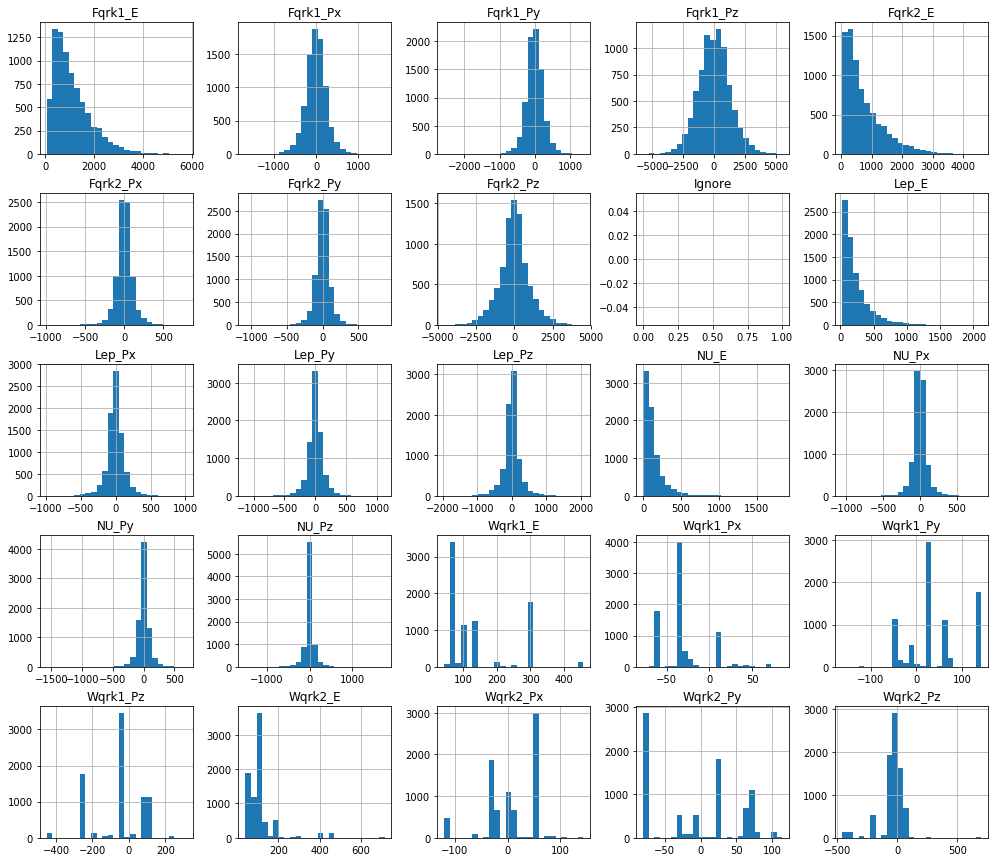

In [6]:
hist = data.hist(bins=25, figsize=[17,15])